# Final Project Report

# Introduction (several paragraphs)
explains data (source, variables, collection method etc), goal, and motivation for goal

Climate change is a phrase we here often in our lives nowadays, and we are often 

left wondering about the causes and how we can affect change. For our project, we 

decided to take a look at local climate trends over the last 50 years and what might 

be affecting them. More specifically, we have decided to analyze the level of annual 

CO2 emissions in DC since 1970 and compare this to the annual average temperature of 

DC over the same period of time.


In order to complete our analysis, we would need to collect data about DC temperature

and emissions trend over the past 50 years. Fortunately, this variety of data is readily

available directly from government managed sources. Our emissions data was collected from

the US Energy Information Administration (EIA) and included the CO2 emissions in million

metric tons by state from 1970 to 2020. This dataset used states for index and years for

columns, so data cleaning was necessary which we will detail in the following section.


The next data we needed to seek was historical temperature data for DC. This data was

accessible from NOAA. The data set included DC's monthly, annual, and seasonal

average temperature ranging from 1871 to March of 2023. It should be noted that this

data was accessed in the form of a pdf, so online software was needed to convert the pdf

dataset into a csv. Since the dataset is small enough to read over manually, we were able

to ensure that no data was lost in this process.


Our goal is to determine whether historical emissions may have had an impact on temperature

trends in DC over the past 50 years. We will create a visualization to see the trends, as well

as perform a regression analysis to see if there are any significant findings.

# Method (length depends on project)
explains in detail the cleaning, preprocessing steps, and analytic steps you took. Should be detailed enough someone else could replicate your work.

Once we had the two data sets we needed in order to complete our analysis, we started the data cleaning process.

The emissions data set was originally downloaded as an excel file, which allowed us to do preprocessing in excel

without having to manually drop columns or rows with pandas. The first step was to take only the data for DC since

the data set included emissions data for every state. To do this we copied only column names and the row of data

for DC, then pasted it into a new excel sheet. We saved this as a csv titled 'DCemissions.csv' that we could import

into our notebook workspace. Once we read the csv file into our workspace, there were a couple columns at the end

that were not relevant to our intended use, so we dropped them from the dataframe and were ready to move on to the

temperature data.

The dataset containing DC's historic temperature trends required a few more processing steps than the emissions data.

Initially, the dataset was in pdf format, seemingly serving only the purpose of allowing the public to view the historic

data. To get the data into a workable format, we used a free pdf to excel converter to put the data into excel and

prepare it for further cleaning. Within excel there were a few changes we made before downloading the data to a csv.

First, the pdf version of the data repeated the column headers on each page, so we had to remove all of the repeated

headers. There were also some rows which were completely empty, so we went through and removed each of these rows from the

data set. Finally, the temperature data ranged from 1871 to the most recent month of 2023, while the emissions data

only spanned from 1970 to 2020, so we shortened the temperature data to the same range. We then converted the excel

file to a csv titled "DCtemps.csv" and imported it into the workspace.


Now it was time to reformat both data sets so that they could be combined for analysis.

# Preprocessing (length depends on project)
cleans and manipulates data into the right format for analysis

In [1]:
import pandas as pd
import statistics as stat
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read DC Emissions data from csv file
DCemissions = pd.read_csv('data/DCemissions.csv')
DCemissions.head()

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,Percent,Absolute,Percent.1,Absolute.1
0,District of Columbia,13.6,11.9,11.3,11.9,9.8,7.9,7.7,7.9,7.5,...,3.0,2.8,2.6,2.9,2.8,2.4,-82.4%,-11.2,-14.5%,-0.4


In [3]:
# Read DC Temperature data from csv file
DCtemps = pd.read_csv('data/DCtemps.csv')
DCtemps.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,NOV,DEC,ANN,WINTER,SPRING,SUMMER,AUTUMN,1ST HALF,2ND HALF,Unnamed: 20
0,1970,30.0,37.1,41.9,55.3,68.3,75.2,79.2,79.0,75.0,...,49.3,39.7,57.7,34.5,55.2,77.8,62.3,51.3,64.1,NaN
1,1971,31.3,39.1,43.2,55.0,63.7,75.9,78.3,76.7,73.0,...,48.2,45.5,57.9,36.7,54.0,77.0,62.0,51.4,64.4,NaN
2,1972,38.5,36.5,45.6,54.1,64.6,70.2,77.5,75.9,71.0,...,46.8,43.6,56.7,40.2,54.8,74.5,57.9,51.6,61.8,NaN
3,1973,37.6,37.0,51.1,56.0,62.8,77.1,79.2,79.9,74.3,...,51.6,41.9,59.3,39.4,56.6,78.7,63.1,53.6,65.0,NaN
4,1974,42.9,39.2,49.2,58.3,65.1,71.5,79.0,78.4,70.2,...,50.9,43.1,58.8,41.3,57.5,76.3,59.5,54.4,63.2,NaN


In [4]:
# Extract the 'YEAR' and 'ANN' columns from DCtemps
DCtempsdf = DCtemps[['YEAR', 'ANN']]
DCtempsdf.head()

,YEAR,ANN
0,1970,57.7
1,1971,57.9
2,1972,56.7
3,1973,59.3
4,1974,58.8


In [5]:
# Drop columns that don't include information about the yearly emissions
DCemissions.drop(columns=['Percent', 'Absolute', 'Percent.1', 'Absolute.1'], inplace=True)

# Unpivot the DCemissions dataframe from a wide format to a long format
DCemissionsdf = DCemissions.melt(id_vars='State', var_name='Year', value_name='CO2EMISSIONS')

# Drop the 'State' column from DCemissionsdf
DCemissionsdf.drop(columns=['State'], inplace=True)

DCemissionsdf.head()

,Year,CO2EMISSIONS
0,1970,13.6
1,1971,11.9
2,1972,11.3
3,1973,11.9
4,1974,9.8


In [6]:
# Merge the DCtempsdf and DCemissionsdf dataframes
merged = pd.concat([DCtempsdf, DCemissionsdf], axis=1)

# Drop the 'Year' column from DCemissionsdf
merged.drop(columns=['Year'], inplace=True)

merged.head()

,YEAR,ANN,CO2EMISSIONS
0,1970,57.7,13.6
1,1971,57.9,11.9
2,1972,56.7,11.3
3,1973,59.3,11.9
4,1974,58.8,9.8


In [7]:
# Set the index of the merged dataframe to the 'YEAR' column
merged.set_index(merged['YEAR'], inplace=True)

# Drop the 'YEAR' column from the merged dataframe
merged.drop(columns=['YEAR'], inplace=True)

# Rename the columns of the merged dataframe
merged.rename(columns={'ANN': 'Annual_Temp_Fahrenheit', 'CO2EMISSIONS': 'CO2_Emissions_Tons'}, inplace=True)

merged.head()

,Annual_Temp_Fahrenheit,CO2_Emissions_Tons
YEAR,,
1970,57.7,13.6
1971,57.9,11.9
1972,56.7,11.3
1973,59.3,11.9
1974,58.8,9.8


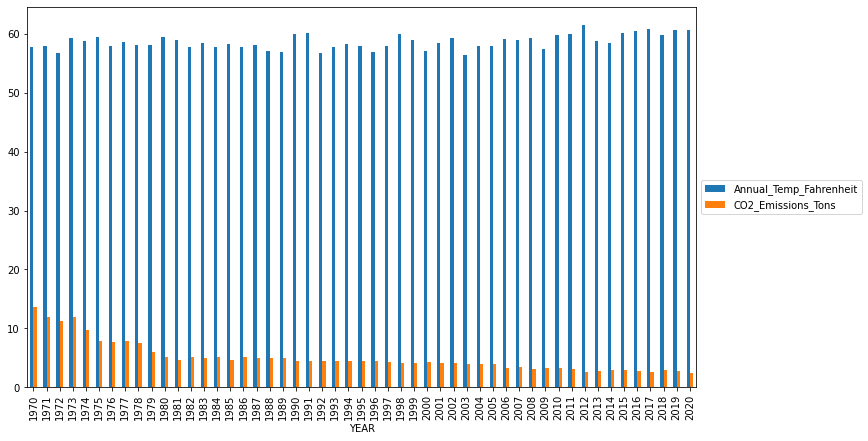

In [8]:
ax = merged.plot.bar(stacked=False, figsize=(12, 7))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Results

Summarizes and visualizes the data as appropriate to address your goal. May be broken down into subsections if that makes sense.

The visualization below shows the trends in Annual Temperature and CO<sub>2</sub> from 1970 to 2020. 

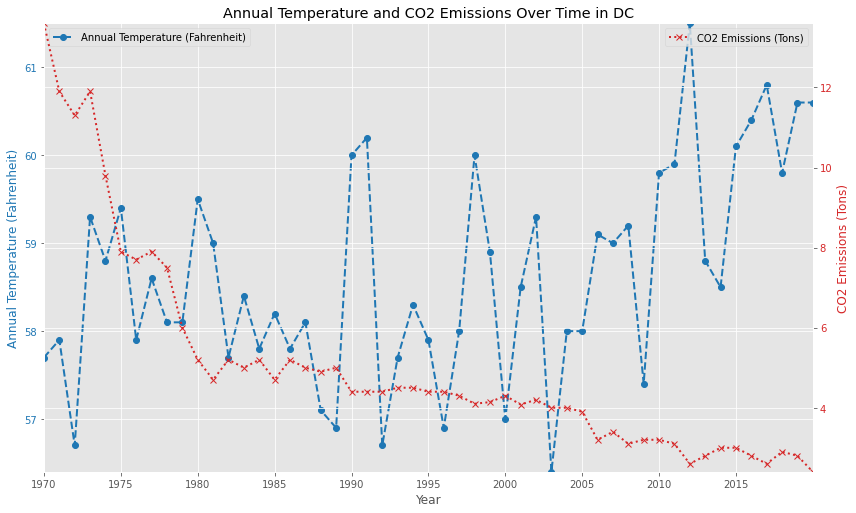

In [9]:
df = merged

plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the Annual Temperature (Fahrenheit) data
ax1.set_xlabel('Year')
ax1.set_ylabel('Annual Temperature (Fahrenheit)', color='tab:blue')
ax1.plot(df.index, df['Annual_Temp_Fahrenheit'], color='tab:blue', linestyle='--', linewidth=2, marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlim(df.index.min(), df.index.max())
ax1.set_ylim(df['Annual_Temp_Fahrenheit'].min(), df['Annual_Temp_Fahrenheit'].max())
ax1.legend(['Annual Temperature (Fahrenheit)'], loc='upper left')
ax1.grid(True)

# Plot the CO2 Emissions (Tons) data
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 Emissions (Tons)', color='tab:red')
ax2.plot(df.index, df['CO2_Emissions_Tons'], color='tab:red', linestyle=':', linewidth=2, marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim(df['CO2_Emissions_Tons'].min(), df['CO2_Emissions_Tons'].max())
ax2.legend(['CO2 Emissions (Tons)'], loc='upper right')

# Set the x-axis ticks
ticks_frequency = 5
xticks = np.arange(df.index.min(), df.index.max(), ticks_frequency)
ax1.set_xticks(xticks)

fig.tight_layout()
plt.title('Annual Temperature and CO2 Emissions Over Time in DC')
plt.show()

As the visualization shows, while CO<sub>2</sub> emissions have reduced over the last 50 years in the DC area, the temperature has increased in the same span of time. While there was a steady decrease in the amount of CO<sub>2</sub> emissions, there was a consisten

# Discussion (several paragraphs)
What are the implications of your findings with respect to your goal

# Limitations (couple paragraphs)
What are the limitations of the data set and your analyses

# Conclusion (couple paragraphs)
What is the final take away from your work